
# <cap> Data Wine Exploration </cap>

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error as mse, accuracy_score
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data='winequality-red.csv'
wine=pd.read_csv(data)

#### Data Wrangling

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


qual_space=np.linspace(3,8,4)
level=['Low','Mid','High']
wine['quality-level']=pd.cut(wine['quality'],qual_space,labels=level, include_lowest=True)

In [5]:
wine.describe(include='all').round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [6]:
wine.agg(['min','max'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3
max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.00,14.9,8


#### Data Viz 

In [240]:
def wine_col_against(graph_type,df,col_1,col_2):
    plt.figure(figsize=(15,5))
    sns.graph_type(wine[col_1],wine[col_2],line_kws={'color':'purple'})
    plt.title(f'{col_1} against {col_2}')
    plt.show()
    plt.close()

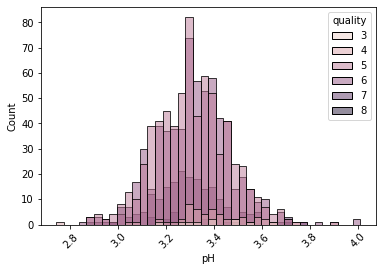

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [151]:
# col_against(wine,'fixed acidity','citric acid')
# col_against(wine,'free sulfur dioxide','total sulfur dioxide')
# col_against(wine,'alcohol','quality')
sns.histplot(data=wine,x='pH',hue='quality',color='virirdis')
plt.xticks(rotation=45)
plt.show()
wine['pH'].describe()

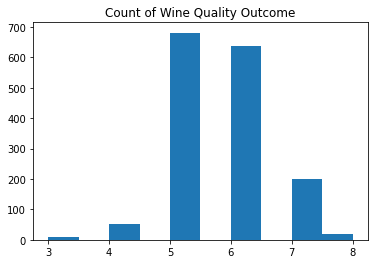

In [112]:
plt.hist(wine['quality'])
plt.title('Count of Wine Quality Outcome')
plt.show()

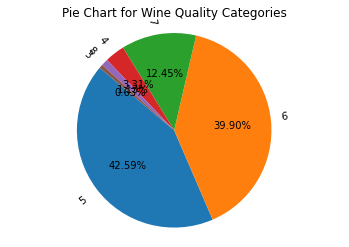

In [113]:
# plt.figure(figsize=(5,5))
plt.pie(wine['quality'].value_counts(),labels=wine['quality'].value_counts().index,autopct='%1.2f%%',startangle=140,rotatelabels=45)
plt.axis('equal')
# plt.tight_layout()
# plt.axes(p)
plt.title('Pie Chart for Wine Quality Categories' )
plt.show()

In [12]:
wine.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

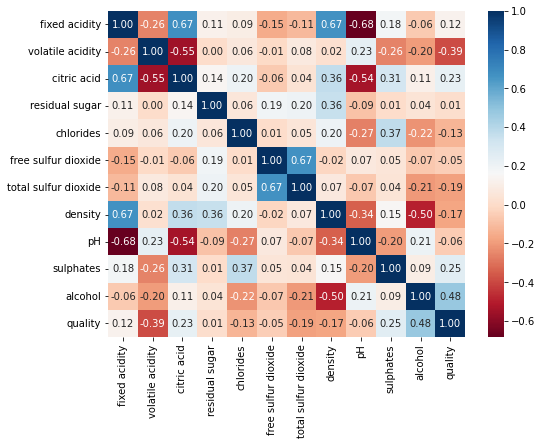

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(wine.corr(),cmap='RdBu',annot=True,cbar=True,fmt='.2f')
plt.show()

<h1>Wine Quality Model</h1>
<div><div style="color: blue; font-size: 39;">The aim is to generate a model which can be able to predict the quality of wine based on some factors </div>
<ul class='.custom-list'>
  <li>Acidity Level</li>
  <li>Alcohol</li>
  <li>Sugar Levels</li>
  <li>etc.</li>
</ul>
</div>
<style>
.custom-list {
    list-style-type: upper-roman; /* Change to the desired list type (e.g., decimal, lower-alpha, upper-roman, etc.) */
}
</style>

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

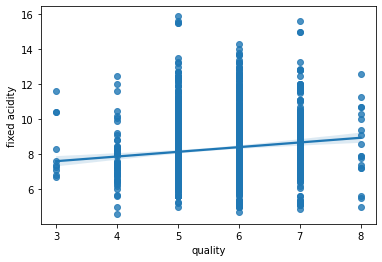

In [188]:
sns.regplot(y=wine['fixed acidity'],x=wine['quality'])

#### Splitting of Train/Test Samples 

In [215]:
# X=wine[['volatile acidity','citric acid', 'sulphates', 'alcohol','density','total sulfur dioxide']]
X=wine.drop(columns=['quality','residual sugar','pH','chlorides','density'],axis=1)
y=wine['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=22,stratify=y)

### Model Building

#### Label Encoding and Standardization of Features

In [216]:
scaler_=StandardScaler()
label_=LabelEncoder()
X_train_scaled=scaler_.fit_transform(X_train)
X_test_scaled=scaler_.fit_transform(X_test)
y_train_le=label_.fit_transform(y_train)
y_test_le=label_.fit_transform(y_test)

#### Decision Tree Classifier

In [250]:
param_grid={
    'max_depth':[6,10,13,15,18,20],
    'criterion':['gini','log_loss'],
    'max_features':["sqrt", "log2"]
}

In [251]:
DTC=DecisionTreeClassifier(random_state=7,splitter='best',max_depth=5,)

In [252]:
grid_cv=GridSearchCV(DTC,param_grid,scoring='accuracy',cv=5)

In [253]:
grid_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=7),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'max_depth': [6, 10, 13, 15, 18, 20],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [256]:
grid_cv.best_params_,grid_cv.best_score_

({'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt'},
 0.6020557598039216)

In [222]:
y_pred_decision=grid_cv.predict(X_test_scaled)

C:\Users\AMOS OSHIYOYE\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AMOS OSHIYOYE\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


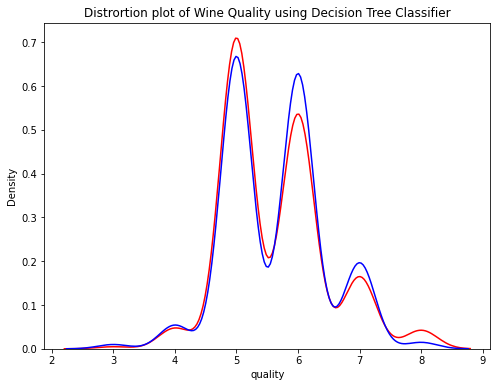

In [223]:
plt.figure(figsize=(8,6))
sns.distplot(y_pred_decision,color='red',hist=False,label='Predicted')
sns.distplot(y_test,color='blue',hist=False,label='True')
plt.title('Distrortion plot of Wine Quality using Decision Tree Classifier')
plt.show()

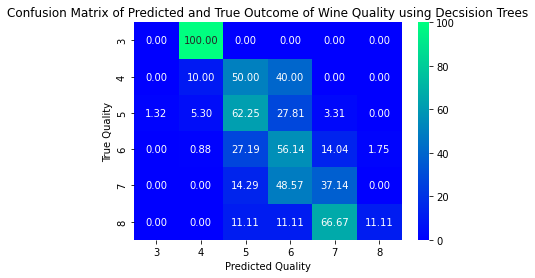

In [224]:
confi_dtc=confusion_matrix(y_pred_decision,y_test)
confi_dtc=confi_dtc/confi_dtc.sum(1)[:,np.newaxis]
sns.heatmap(confi_dtc*100,annot=True,cmap='winter',xticklabels=np.unique(wine['quality']),yticklabels=np.unique(wine['quality']),fmt='.2f')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.title('Confusion Matrix of Predicted and True Outcome of Wine Quality using Decsision Trees')
plt.show()

#### XGBoost Classifier

In [225]:
xgb=XGBClassifier(max_depth=18)

In [226]:
param_grid={
    'max_depth':[6,10,13,15,18,20,30,50,80,110]
}

In [227]:
xgb_cv=GridSearchCV(xgb,param_grid,cv=5,scoring='accuracy')
xgb_cv.fit(X_train_scaled, y_train_le)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=18,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [6, 10, 13, 15, 18, 20, 30, 50, 80, 110]},
             scoring='accuracy')

In [228]:
criterion='gini'
max_depth= 10
max_features='sqrt'
xgb_cv.best_params_,xgb_cv.best_score_

({'max_depth': 30}, 0.648155637254902)

In [229]:
y_pred_xgb=xgb_cv.predict(X_test_scaled)
xgb_cv.score(X_train_scaled,y_train_le)

1.0

C:\Users\AMOS OSHIYOYE\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AMOS OSHIYOYE\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


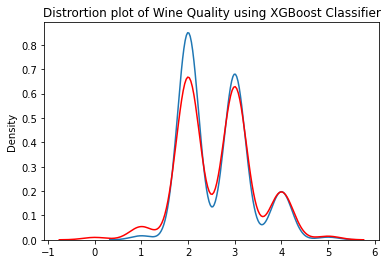

In [230]:
sns.distplot(y_pred_xgb,hist=False)
sns.distplot(y_test_le,hist=False,color='red')
plt.title('Distrortion plot of Wine Quality using XGBoost Classifier')
plt.show()

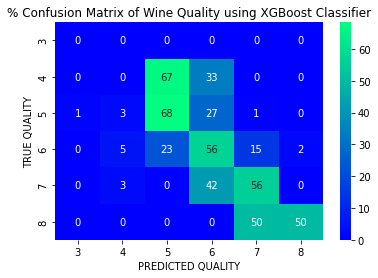

In [231]:
cm_xgb=confusion_matrix(y_pred_xgb,y_test_le)
cm_xgb_sum = np.sum(cm_xgb, axis=1)
cm_xgb_sum[cm_xgb_sum==0]=1
cm_xgb=(cm_xgb/cm_xgb_sum[:,np.newaxis])*100
# cm_xgb
sns.heatmap(cm_xgb,cmap='winter',annot=True,xticklabels=np.unique(y_test.values),yticklabels=np.unique(y_test.values),fmt='.0f')
plt.xlabel('PREDICTED QUALITY')
plt.ylabel('TRUE QUALITY')
plt.title('% Confusion Matrix of Wine Quality using XGBoost Classifier')
plt.show()

#### KNearest Neighbor

In [233]:
knn1=KNeighborsClassifier()

In [232]:
param_grid={
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights':['uniform', 'distance'], # Weighting of neighbors (uniform or distance-based)
    'n_neighbors': list(range(3,16,3)),   # Different values of k
    'metric': ['euclidean', 'manhattan']
}

In [234]:
knn_gcv=GridSearchCV(knn1,param_grid,cv=5)
knn_gcv.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 6, 9, 12, 15],
                         'weights': ['uniform', 'distance']})

In [235]:
y_knn_pred=knn_gcv.predict(X_test_scaled)
mse(y_knn_pred,y_test), accuracy_score(y_knn_pred,y_test),knn_gcv.best_params_


(0.5375,
 0.615625,
 {'algorithm': 'auto',
  'metric': 'manhattan',
  'n_neighbors': 15,
  'weights': 'distance'})

C:\Users\AMOS OSHIYOYE\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\AMOS OSHIYOYE\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


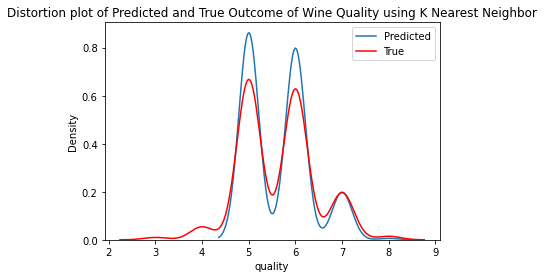

In [236]:
sns.distplot(y_knn_pred,hist=False,label='Predicted')
sns.distplot(y_test,hist=False,color='red',label='True')
plt.title('Distortion plot of Predicted and True Outcome of Wine Quality using K Nearest Neighbor')
plt.legend()
plt.show()

In [243]:
confusion_knn=confusion_matrix(y_test,y_knn_pred)
confusion_knn=(confi_knn/confi_knn.sum(1)[:,np.newaxis])*100

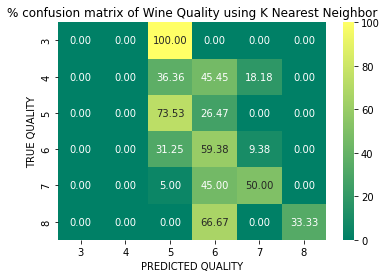

In [244]:
sns.heatmap(confusion_knn,cmap='summer',annot=True,xticklabels=np.unique(y_test.values),yticklabels=np.unique(y_test.values),fmt='.2f')
plt.xlabel('PREDICTED QUALITY')
plt.ylabel('TRUE QUALITY')
plt.title('% confusion matrix of Wine Quality using K Nearest Neighbor')
plt.show()